#### Notebook CV Iris Dataset 


In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
# 3.1.Cargue los datos iris en un data frame (pandas) e imprima la descripción de los datos (columnas yrenglones), tipo y las 10 primeras filas de los datos. Fuente de datos:
df = pd.read_csv("iris/iris.data")

print("Data shape:", df.shape)
print("\nDate types\n", df.dtypes)
print("\n First 10 rows:\n", df.head(10))

Data shape: (149, 5)

Date types
 5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

 First 10 rows:
    5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
5  4.6  3.4  1.4  0.3  Iris-setosa
6  5.0  3.4  1.5  0.2  Iris-setosa
7  4.4  2.9  1.4  0.2  Iris-setosa
8  4.9  3.1  1.5  0.1  Iris-setosa
9  5.4  3.7  1.5  0.2  Iris-setosa


In [3]:
# 3.2. Imprimir las llaves (nombres de columnas) y el número de filas y columnas.
print("\nLlaves (nombres de columnas):", df.keys()) 
print("Number of  rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Llaves (nombres de columnas): Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')
Number of  rows: 149
Number of columns: 5


In [4]:
# Adding the coulumn names as the columns does not have names -> not in the not really a task but....
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
# 3.3. Obtener el número de muestras faltantes o NaN
print("\nNumber of NaNs:\n", df.isnull().sum())
print("Number all Nans:", df.isnull().sum().sum())


Number of NaNs:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64
Number all Nans: 0


In [10]:
# 3.4. Crear un arreglo 2-D de 5x5 con unos en la diagonal y ceros en el resto,
# y convertirlo a una matriz dispersa en formato CRS.
mat = np.eye(5)
# Convertir a formato CSR
mat_disp = csr_matrix(mat)
print("\nCRS Matrix:")
print(mat_disp)


CRS Matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [11]:
# 3.5. Mostrar estadísticas básicas (solo la media y la desviación estándar) usando describe.
descrip = df.describe()
print("\nMean of columns:\n", descrip.loc['mean'])
print("\nStandard Dev:\n", descrip.loc['std'])



Mean of columns:
 sepal_length    5.848322
sepal_width     3.051007
petal_length    3.774497
petal_width     1.205369
Name: mean, dtype: float64

Standard Dev:
 sepal_length    0.828594
sepal_width     0.433499
petal_length    1.759651
petal_width     0.761292
Name: std, dtype: float64


In [12]:
# 3.6. Obtener el número de muestras para cada clase.
# Dado que el archivo no tiene encabezados, se asume que la columna 4 contiene la clase.
print("\nNúmero de muestras por clase (sin encabezado):")
print(df['class'].value_counts())


Número de muestras por clase (sin encabezado):
class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64


In [16]:
# 3.7. Añadir un encabezado a los datos usando los nombres del archivo iris.names. --> Done earlier
# Repetir el conteo de muestras por clase usando el encabezado.
df.keys()


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [17]:
# 3.8. Imprimir las diez primeras filas y las dos primeras columnas usando índices de columnas.
print("\nFirst 10 rows of first 2 columns:")
print(df.iloc[:10, :2])



First 10 rows of first 2 columns:
   sepal_length  sepal_width
0           4.9          3.0
1           4.7          3.2
2           4.6          3.1
3           5.0          3.6
4           5.4          3.9
5           4.6          3.4
6           5.0          3.4
7           4.4          2.9
8           4.9          3.1
9           5.4          3.7


### Visualizations using plt and seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


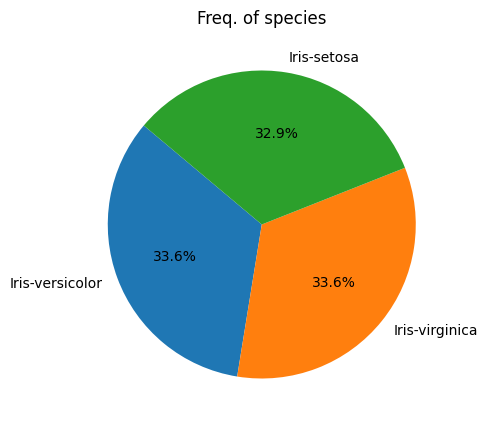

In [23]:
# 3.10. Gráfica de pastel para la frecuencia de las tres especies
species_counts = df['class'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Freq. of species')
plt.show()

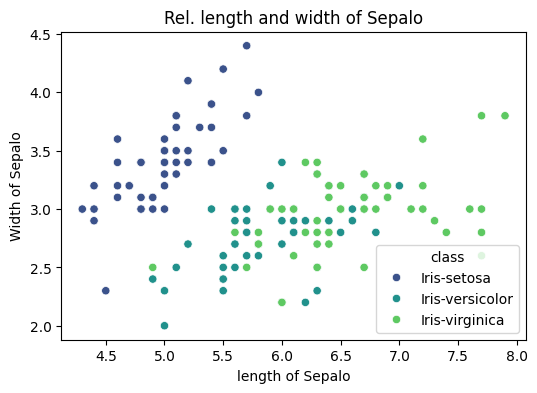

In [25]:
# 3.11. Gráfica de dispersión: Relación entre longitud y ancho del sépalo
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='class', palette='viridis')
plt.title('Rel. length and width of Sepalo')
plt.xlabel('length of Sepalo')
plt.ylabel('Width of Sepalo')
plt.show()

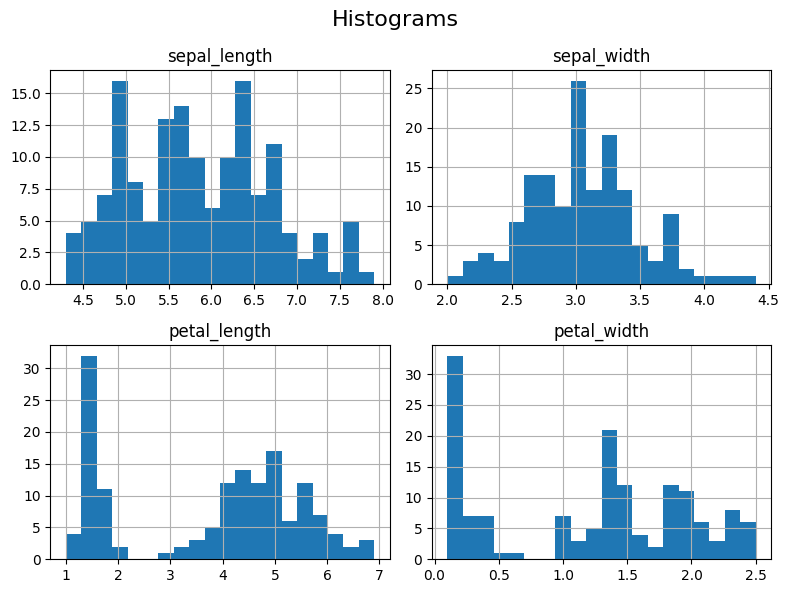

In [54]:
#3.12. Histogramas de las variables numéricas
df.hist(bins=20, figsize=(8,6))
plt.suptitle('Histograms', fontsize=16)
plt.tight_layout() 
plt.show()

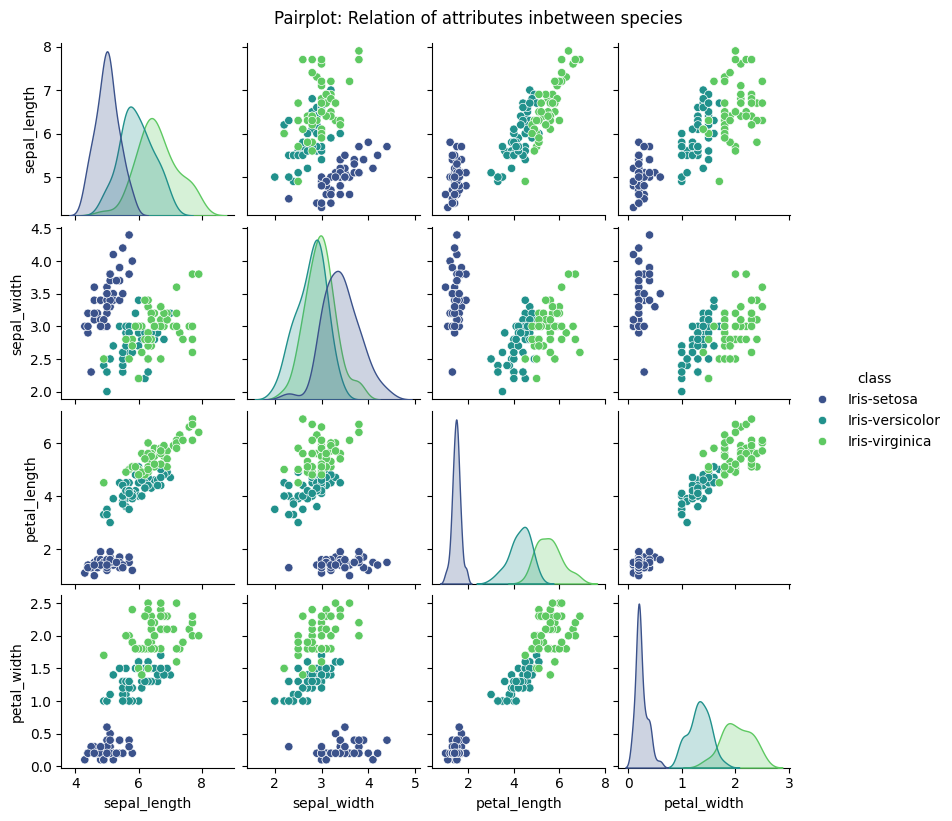

In [55]:
# 3.13. Pairplot de Seaborn: Visualización de relaciones entre variables
sns.pairplot(df, hue='class', height=2, palette='viridis')
plt.suptitle('Pairplot: Relation of attributes inbetween species', y=1.02)
plt.show()

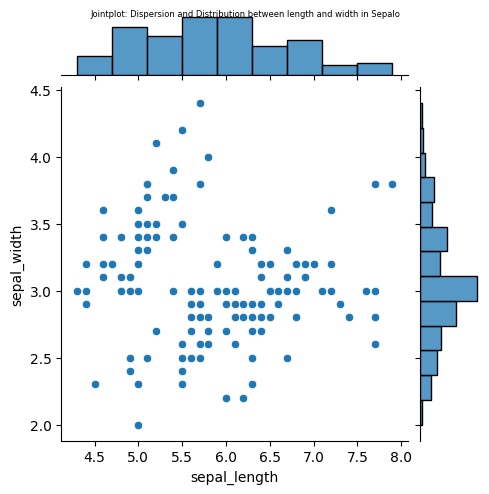

In [58]:
#3.14. Jointplot: Dispersión y distribución entre longitud y ancho del sepalo
g = sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='scatter', height=5, palette='viridis')
g.figure.suptitle('Jointplot: Dispersion and Distribution between length and width in Sepalo', fontsize= 6)
plt.show()

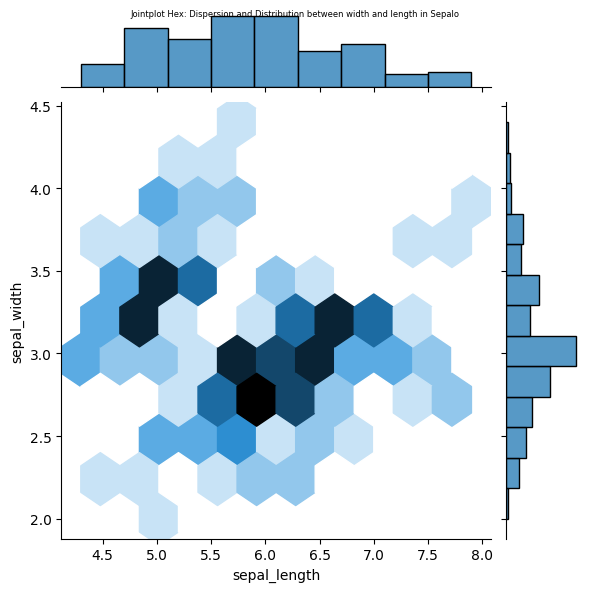

In [59]:
# 3.15. Jointplot con kind="hex": Dispersión y distribucion hexagonal
g_hex = sns.jointplot(data=df, x='sepal_length', y='sepal_width', kind='hex', height=6, palette='viridis')
g_hex.figure.suptitle('Jointplot Hex: Dispersion and Distribution between width and length in Sepalo', fontsize=6)
plt.show()